# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING DATASET

In [2]:
tvd = pd.read_csv("tv_data.csv")

In [3]:
tvd.head()

,TV,Sales
0,12.5,44.7
1,14.8,50.2
2,10.2,37.8
3,12.9,43.8
4,23.9,60.3


In [4]:
tvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
TV       50 non-null float64
Sales    50 non-null float64
dtypes: float64(2)
memory usage: 880.0 bytes


In [5]:
tvd.shape

(50, 2)

In [6]:
tvd.describe()

,TV,Sales
count,50.000000,50.000000
mean,28.720000,74.638000
std,11.128874,20.873505
min,7.200000,34.400000
25%,19.600000,58.200000
50%,27.900000,71.050000
75%,37.450000,89.275000
max,47.500000,112.700000


In [7]:
tvd.corr()

,TV,Sales
TV,1.000000,0.924082
Sales,0.924082,1.000000


# PLOTTING DATA

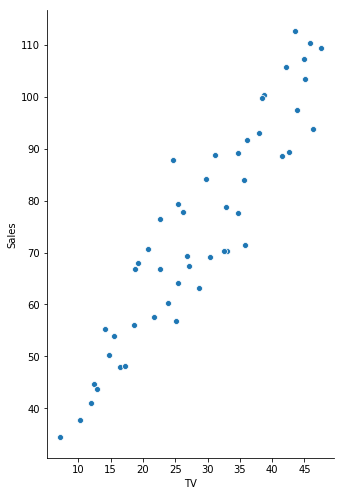

In [8]:
sns.pairplot(tvd, x_vars=["TV"], y_vars=["Sales"], height=7, aspect=0.7, kind="scatter", palette="y")

# DIVIDING DATA IN x AND y (Co-efficient and Intercept)

In [9]:
x = tvd["TV"]
x.head()

0    12.5
1    14.8
2    10.2
3    12.9
4    23.9
Name: TV, dtype: float64

In [10]:
y = tvd["Sales"]
y.head()

0    44.7
1    50.2
2    37.8
3    43.8
4    60.3
Name: Sales, dtype: float64

# MAKING TRAIN AND TEST SETS

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=2)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
x_train = x_train[:,np.newaxis]
x_test = x_test[:,np.newaxis]

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(37, 1)
(37,)
(13, 1)
(13,)


# CREATING SVR MODEL AND FITTING TRAIN DATA

In [14]:
regr = make_pipeline(StandardScaler(),SVR(C=2.0, epsilon=3.1, kernel="linear"))
regr.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=2.0, cache_size=200, coef0=0.0, degree=3, epsilon=3.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

# PREDICTING THE TEST SET

In [15]:
y_pred = regr.predict(x_test)

# CALCULATING AND VISUALIZING ACCURACY AND ERROR

In [16]:
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Error:",mse)
print("Accuracy:",score*100)

Error: 51.70966660225444
Accuracy: 88.53985188143648


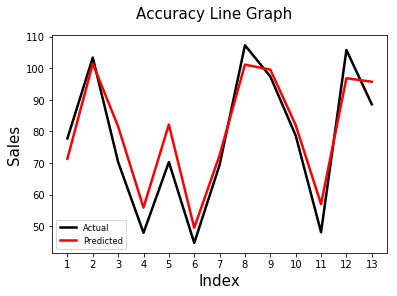

In [21]:
c = [i for i in range(1,14)]
fig = plt.figure()
plt.plot(c,y_test, color="k", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="r", linewidth=2.5, linestyle="-")
fig.suptitle("Accuracy Line Graph", fontsize=15)
plt.xlabel("Index", fontsize=15)
plt.ylabel("Sales", fontsize=15)
plt.legend(labels=["Actual","Predicted"], loc=0, fontsize="small")
plt.xticks(np.arange(1,14),c)
plt.show()